GSP Data preprocessing


In [ ]:
import pandas as pd
from pandas import *
read_file1 = pd.read_excel("/content/drive/MyDrive/Files/Final GSP Accident location Data and list (1).xlsx")
csv_file = read_file1.to_csv("Final GSP Accident location Data and list.csv", index = None, header = True)

reads = read_csv("Final GSP Accident location Data and list.csv")

list_of_locations = reads["Accident Locations"].tolist()

sample_locations = list_of_locations[-11:]

new_locations =[]
for i in range(5):
  new_locations.append(sample_locations[i])

In [ ]:
read_file3= pd.read_excel("/content/drive/MyDrive/Files/Speed_weather data for GSP (3).xlsx")
read_file3.to_csv("Speed_weather data for everything.csv", index = None, header = True)

In [ ]:
!pip install snscrape
import os
import snscrape.modules.twitter as sntwitter
import urllib.request
os.system("snscrape --jsonl  --since 2021-01-01 twitter-search 'from:511njgsp until:2023-01-01' > user-tweets.json")

tweets_df = pd.read_json('user-tweets.json', lines = True)


tweets_list = []

for tweet in sntwitter.TwitterSearchScraper('from:511njgsp since:2021-01-01 until:2023-01-01').get_items():

  tweets_list.append(tweet.rawContent)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 KB 3.0 MB/s eta 0:00:00


In [ ]:
accidents_count = {}
for location in new_locations:
  counter = 0
  for tweets in tweets_list:
    if 'Crash' in tweets:
      if location in tweets:
        counter = counter + 1

  accidents_count[location] = counter

crash_tweets_gsp = []
for tweets in tweets_list:
  if 'Crash' in tweets:
    crash_tweets_gsp.append(tweets)

print(len(crash_tweets_gsp))

print(accidents_count)

5441
{'Exit 144': 116, 'Exit 109': 126, 'Exit 142': 157, 'Exit 145 ': 170, 'Exit 10': 288}


In [ ]:
!pip install snscrape
import snscrape.modules.twitter as sntwitter
import os
read_file = pd.read_excel('/content/drive/MyDrive/Files/Refined NJ Turnpike possible locations copy.xlsx')

read_file.to_csv('Refined NJ Turnpike possible locations.csv', index = None, header = True)

thecsvfile = read_csv('Refined NJ Turnpike possible locations.csv')

thedata = thecsvfile['Possible Accident_Sites'].tolist()

print(len(thedata))

accident_locations = [*set(thedata)]#use this as list



os.system("snscrape --jsonl  --since 2021-01-01 twitter-search 'from:511njtpk until:2023-01-01' > user-tweets.json")

tweets_df2 = pd.read_json('user-tweets.json', lines = True)


tweets_list_NJ_turnPike = []

for tweet in sntwitter.TwitterSearchScraper('from:511njtpk since:2021-01-01 until:2023-01-01').get_items():
    tweets_list_NJ_turnPike.append(tweet.rawContent)


accidents_count_NJTurnpike = {}
for location in accident_locations:
    counter = 0
    for tweets in tweets_list_NJ_turnPike:
        if 'Crash' in tweets:
            if location == "Interchange 1":
                location = 'Interchange 1 '
            if location in tweets:
                counter = counter + 1

    accidents_count_NJTurnpike[location] = counter

crash_tweets = []
for tweets in tweets_list_NJ_turnPike:
  if 'Crash' in tweets:
    crash_tweets.append(tweets)

#print(len(crash_tweets))

#print(accidents_count)

number_of_accidents_NJTurnpike = list(accidents_count_NJTurnpike.values())
accident_location_NJTurnpike= list(accidents_count_NJTurnpike.keys())


the_sites_list = []
for i in range(30):
    highest=max(number_of_accidents_NJTurnpike)
    the_sites_list.append(highest)
    number_of_accidents_NJTurnpike.remove(highest)

number_of_accidents = list(accidents_count_NJTurnpike.values())
final_accident_location_NJTurnpike = []
for accidents in the_sites_list:
    final_accident_location_NJTurnpike.append(accident_location_NJTurnpike[number_of_accidents.index(accidents)])



print(final_accident_location_NJTurnpike)



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
36
['Interchange 13', 'Interchange 14', 'Interchange 9', 'Interchange 15W', 'Interchange 11', 'Interchange 8A', 'Interchange 13A', 'North of Interchange 8', 'Interchange 12', 'North of Interchange 7', 'Interchange 10', 'Interchange 4', 'Interchange 2', ' Interchange 16W', 'Interchange 3', 'North of Interchange 7A', 'Interchange 14A', ' Interchange 16E', 'Interchange 1 ', 'Interchange 18W', 'Southern Mixing Bowl', 'North of Interchange 5', 'Molly Pitcher Service Area', 'Interchange 14B', 'Interchange 14C', 'North of Delaware Memorial Bridge', 'Eastern Spur Interchange 15E', 'North of Exit 69', 'North of Exit 69', 'North of Exit 69']


In [ ]:
NJ_Turnpike_accidents = {}
for stuff in final_accident_location_NJTurnpike:
  number = accidents_count_NJTurnpike[stuff]
  NJ_Turnpike_accidents[stuff]=number
print(NJ_Turnpike_accidents)

len(crash_tweets)


accidents_count.update(NJ_Turnpike_accidents)



print(accidents_count)

{'Interchange 13': 740, 'Interchange 14': 395, 'Interchange 9': 360, 'Interchange 15W': 311, 'Interchange 11': 271, 'Interchange 8A': 251, 'Interchange 13A': 242, 'North of Interchange 8': 217, 'Interchange 12': 201, 'North of Interchange 7': 188, 'Interchange 10': 173, 'Interchange 4': 167, 'Interchange 2': 129, ' Interchange 16W': 127, 'Interchange 3': 104, 'North of Interchange 7A': 101, 'Interchange 14A': 94, ' Interchange 16E': 93, 'Interchange 1 ': 77, 'Interchange 18W': 74, 'Southern Mixing Bowl': 71, 'North of Interchange 5': 68, 'Molly Pitcher Service Area': 52, 'Interchange 14B': 26, 'Interchange 14C': 24, 'North of Delaware Memorial Bridge': 20, 'Eastern Spur Interchange 15E': 1, 'North of Exit 69': 0}
{'Exit 144': 116, 'Exit 109': 126, 'Exit 142': 157, 'Exit 145 ': 170, 'Exit 10': 288, 'Interchange 13': 740, 'Interchange 14': 395, 'Interchange 9': 360, 'Interchange 15W': 311, 'Interchange 11': 271, 'Interchange 8A': 251, 'Interchange 13A': 242, 'North of Interchange 8': 217

In [ ]:
import os



accidents =list(accidents_count.values())
locations = list(accidents_count.keys())
susceptibility_dic = {}
test = {}
susceptibility = []
SAR = []
accident_frequency= []
total_susceptibility_list = []
for accident in accidents:
  if accidents.index(accident) < 4:
    SAR_value = accident/(len(crash_tweets_gsp))
  if accidents.index(accident) > 4:
    SAR_value = accident/(len(crash_tweets))
  SAR.append(SAR_value)
  accidents_frequency = accident/365
  accident_frequency.append(accidents_frequency)
  total_susceptibility = SAR_value + accidents_frequency

  if total_susceptibility < 0.507:
    susceptibility_dic[locations[accidents.index(accident)]]= "low susceptibility"
  if total_susceptibility >0.507 and total_susceptibility < 0.808:
    susceptibility_dic[locations[accidents.index(accident)]]= "mid susceptibility"
  if total_susceptibility> 0.808:
    susceptibility_dic[locations[accidents.index(accident)]]= "high susceptibility"

  if locations[accidents.index(accident)] != "Interchange 13":
    susceptibility.append(total_susceptibility)



reads = pd.read_csv("/content/Speed_weather data for everything.csv")
loc = reads['Exits'].tolist()

print(susceptibility_dic)

refined_dic = {}
count = 0
for l in loc:
  if l == "Exit 145":
    l = "Exit 145 "
  if l == "Int 14A":
    l = 'Interchange 14A'
  if l == ' Interchange 9  ' or l=='Interchange 9  ':
    l= "Interchange 9"
  if l== "Interchange 7A":
    l = 'North of Interchange 7A'
  if l == 'Interchange 1':
    l = 'Interchange 1 '
  if l == 'Interchange 5':
    l='North of Interchange 5'
  if l == 'Pennsylvania Ext. West of Toll Plaza':
    l='North of Delaware Memorial Bridge'
  if l == 'Interchange 15E':
    l = 'Eastern Spur Interchange 15E'
  if l  == 'Interchange 16W':
    count = count + 1
    if count == 2:
      print("yes")
      l =' Interchange 16W'
      fart = susceptibility_dic[l]
      refined_dic[' Interchange 16W1'] = fart
    else:
      l =' Interchange 16W'
      fart = susceptibility_dic[l]
      refined_dic[l] = fart

  else:
    fart = susceptibility_dic[l]
    refined_dic[l] = fart
##important

list_files = []
exits = os.listdir('/content/drive/MyDrive/export video')

exits = exits[:-22]
print(exits)
for exit in exits:
  Files = os.listdir('/content/drive/MyDrive/export video' + "/"+ str(exit) )
  if ".ipynb_checkpoints" in Files:
    Files.remove(".ipynb_checkpoints")
  if "Exit 144" == exit:
    list_files.append('/content/drive/MyDrive/export video' + "/"+ str(exit) + '/' +  "MM 145.8 North of Exit 1441 (1) copy 2.mp4")
  else:
    list_files.append('/content/drive/MyDrive/export video' + "/"+ str(exit) + '/' +  str(Files[1]))

NJTurnpike_files = os.listdir('/content/drive/MyDrive/export video')


#print(NJTurnpike_files)

second_try = []
if "Interchange 14" in final_accident_location_NJTurnpike:
  final_accident_location_NJTurnpike[final_accident_location_NJTurnpike.index('Interchange 14')]= 'Int 14A'
if 'Interchange 13' in final_accident_location_NJTurnpike:
  final_accident_location_NJTurnpike.remove('Interchange 13')
for exits in final_accident_location_NJTurnpike:
  for files in NJTurnpike_files:
    if exits in files:
      second_try.append(files)

print(second_try)

list_exits = [ 'Int 14A',
              'Interchange 9'	,
              'Interchange 15W'	,
              'Interchange 11',
              'Interchange 8',
              'Interchange 13A',
              'North of Interchange 8',
              'Interchange 16W',
              'Interchange 3',
              'Interchange 4',
              'Interchange 10',
              'Interchange 12',
              'Interchange 7A',
              'Interchange 14',
              'Interchange 2',
              'Interchange 16W1',
              'Interchange 1',
              'Interchange 5',
              'Southern Mixing Bowl',
              'Molly Pitcher Service Area',
              'Pennsylvania Ext. West of Toll Plaza',
              'Interchange 15E'

]

second_try.append('MM 103.4 South of Interchange 141 (1).mp4')

second_try.append('MM 2.9 Pennsylvania Ext. West of Toll Plaza1.mp4')

print(second_try)
addition_list = []
#count = 0
for exi in list_exits:
  dup = []
  for fil in second_try:
    if exi in fil:
      dup.append(fil)
      if len(dup)>=2:
        #print(dup)
        if exi =="Interchange 11":
          addition_list.append("/content/drive/MyDrive/export video/" + str(dup[0]))
        if exi == "Interchange 1":
          if len(dup) == 3:
            addition_list.append("/content/drive/MyDrive/export video/" + 'MM 002.4 Interchange 11.mp4')
        if exi =="Interchange 7A":
          addition_list.append("/content/drive/MyDrive/export video/" + str(dup[0]))
        if exi == "Interchange 16W":
          addition_list.append("/content/drive/MyDrive/export video/" + str(dup[0]))
        if exi == "Interchange 16W1":
          #print(dup[1])
          addition_list.append("/content/drive/MyDrive/export video/" + str(dup[1]))
      #else:

      if exi == "Interchange 14":
        addition_list.append("/content/drive/MyDrive/export video/" + 'MM 103.4 South of Interchange 141 (1).mp4')
      if exi == 'Pennsylvania Ext. West of Toll Plaza':
        addition_list.append("/content/drive/MyDrive/export video/" + 'MM 2.9 Pennsylvania Ext. West of Toll Plaza1.mp4')

      if exi != "Interchange 7A" and exi != "Interchange 16W" and exi != "Interchange 16W1" and exi != "Interchange 1" and exi != "Interchange 11" and exi != "Interchange 14" and exi != 'Pennsylvania Ext. West of Toll Plaza':

        addition_list.append("/content/drive/MyDrive/export video/" + str(fil))
      #if exi == "Interchange"


total_list = list_files + addition_list

print(total_list)

reads["Videos"] = total_list
reads["Susceptibility"] = list(refined_dic.values())




reads.to_csv('final_model_dataset2.csv', index = None, header = True )



{'Exit 144': 'low susceptibility', 'Exit 109': 'low susceptibility', 'Exit 142': 'low susceptibility', 'Exit 145 ': 'low susceptibility', 'Exit 10': 'high susceptibility', 'Interchange 13': 'high susceptibility', 'Interchange 14': 'high susceptibility', 'Interchange 9': 'high susceptibility', 'Interchange 15W': 'high susceptibility', 'Interchange 11': 'mid susceptibility', 'Interchange 8A': 'mid susceptibility', 'Interchange 13A': 'mid susceptibility', 'North of Interchange 8': 'mid susceptibility', 'Interchange 12': 'mid susceptibility', 'North of Interchange 7': 'mid susceptibility', 'Interchange 10': 'mid susceptibility', 'Interchange 4': 'low susceptibility', 'Interchange 2': 'low susceptibility', ' Interchange 16W': 'low susceptibility', 'Interchange 3': 'low susceptibility', 'North of Interchange 7A': 'low susceptibility', 'Interchange 14A': 'low susceptibility', ' Interchange 16E': 'low susceptibility', 'Interchange 1 ': 'low susceptibility', 'Interchange 18W': 'low susceptibili

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


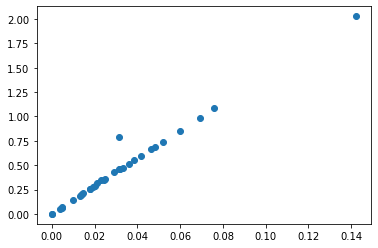

In [ ]:
!pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import seaborn as sb

linear_model_data = pd.DataFrame({"SAR": SAR, "accident_frequency": accident_frequency})

linear_model_data.to_csv("regression")

data = pd.read_csv("regression")
data.head()

show =data.drop(['Unnamed: 0'], axis = 1)

show
show.corr()


#SAR vs. accident frequency
plt.scatter(x= show["SAR"],y=show['accident_frequency'])
plt.show()


#Total susceptibility vs. Weather




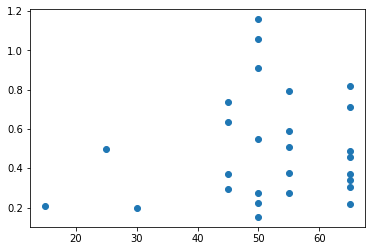

In [ ]:
#Total susceptibility vs speed
premilinary_analysis1 = pd.DataFrame({"Susceptibility": susceptibility})
premilinary_analysis1.to_csv("Total susceptibility vs Speed")

graph1 = pd.read_csv("Total susceptibility vs Speed")

speed = pd.read_csv("/content/final_model_dataset2.csv")

speed_data = speed['Speed']

graph1["Speed"] = speed_data


graph1.head()

real_graph = graph1.drop(['Unnamed: 0'], axis = 1)


plt.scatter(x=real_graph["Speed"], y= real_graph["Susceptibility"])

plt.show()




Total susceptibility vs Weather

32


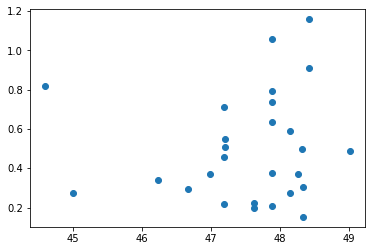

In [ ]:
premilinary_analysis2 = pd.DataFrame({"Susceptibility": susceptibility})

premilinary_analysis2.to_csv("Total susceptibility vs Weather")

graph2 = pd.read_csv("Total susceptibility vs Weather")

weather = pd.read_csv("/content/final_model_dataset2.csv")


print(len(graph2['Susceptibility'] ))
graph2['Annual Rain fall'] = weather["Annual Rain fall"]

real_graph2 = graph2.drop(['Unnamed: 0'], axis = 1)


real_graph2.corr()



#months =list(speed_data.keys())


plt.scatter(x=real_graph2["Annual Rain fall"], y= real_graph2["Susceptibility"])

plt.show()






Total Susceptibility vs Traffic Volume Rate

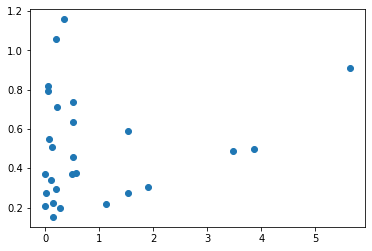

In [ ]:
traffic_rate_dic={'Exit 10': 66, 'Exit 109': 0, 'Exit 142': 303, 'Exit 144': 2314, 'Exit 145': 32, 'Int 14A': 207, 'Interchange 9  ': 115, 'Interchange 15W': 3384, 'Interchange 11': 25, 'Interchange 8A': 302, 'Interchange 13A': 126, 'North of Interchange 8': 302, 'Interchange 16W': 922, 'Interchange 3': 36, 'Interchange 4': 74, 'Interchange 10': 2090, 'Interchange 12': 336, 'Interchange 7A': 300, 'Interchange 14': 1135, 'Interchange 2': 114, 'Interchange 16W1': 922, 'Interchange 1': 8, 'Interchange 5': 81, 'Southern Mixing Bowl': 674, 'Molly Pitcher Service Area': 0, 'Pennsylvania Ext. West of Toll Plaza': 161, 'Interchange 15E': 86}

numberofvehicles = list(traffic_rate_dic.values())


traffic_volume_rate = []

for vehicles in numberofvehicles:
  traffic_volume_rate.append(vehicles/600)

premilinary_analysis3 = pd.DataFrame({"Susceptibility": susceptibility})
premilinary_analysis3.to_csv("Total susceptibility vs Traffic Volume rate")

premilinary_analysis3 = pd.DataFrame({"Traffic Volume rate": traffic_volume_rate})
premilinary_analysis3.to_csv("Total susceptibility vs Traffic Volume rate2")

graph3 = pd.read_csv("Total susceptibility vs Traffic Volume rate")
graph32 = pd.read_csv("Total susceptibility vs Traffic Volume rate2")


graph3["Traffic Volume rate"] = graph32['Traffic Volume rate']

real_graph3 = graph3.drop(['Unnamed: 0'], axis = 1)

plt.scatter(x=real_graph3["Traffic Volume rate"], y= real_graph2["Susceptibility"])

plt.show()

NJ TurnPike Dataprocessing

In [ ]:
import requests
from bs4 import BeautifulSoup as bs

webpage = requests.get("https://climate.rutgers.edu/stateclim_v1/nclimdiv/index.php?stn=NJ003&elem=pcpn")

soup = bs(webpage.content, 'html.parser')
table = soup.select('table')[0]

column = table.find('tbody').find_all('th')

year_list = []
for year in column:
  if str(year.text) == '2022' or str(year.text) == '2021' or str(year.text) == '2020'  :
   year_list.append(column.index(year))

print(year_list)

rainfall_inches = []
for each_year in year_list:
  cells = table.find('tbody').find_all ('tr')[each_year]

  rain_fall = cells.find_all("span")[12]

  rainfall_inches.append(rain_fall.text)

print(rainfall_inches)

[125, 126, 127]
['44.86', '53.34', '46.27']


In [ ]:
!pip install tweepy

import tweepy

import datetime


consumerKey = ""
consumerSecret = ""
accessToken = ""
accessTokenSecret = ""

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)

api = tweepy.API(auth, wait_on_rate_limit=True)

username = "@511njgsp"
startDate = datetime.datetime(2021, 6, 1, 0, 0, 0)
endDate =   datetime.datetime(2023, 1, 1, 0, 0, 0)

tweets = []
tmpTweets = api.user_timeline(username)
for tweet in tmpTweets:
    if tweet.created_at < endDate and tweet.created_at > startDate:
        tweets.append(tweet)

while (tmpTweets[-1].created_at > startDate):
    tmpTweets = api.user_timeline(username, max_id = tmpTweets[-1].id)
    for tweet in tmpTweets:
        if tweet.created_at < endDate and tweet.created_at > startDate:
            tweets.append(tweet)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


TypeError: ignored